In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xroms
#%matplotlib notebook
%matplotlib inline

In [2]:
# Initiate the Dataset
A = xroms.roms_dataset("ocean_avg_0014.nc")

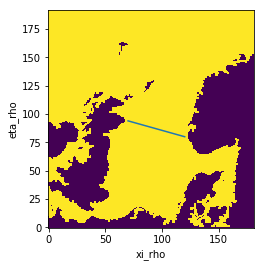

In [15]:
# Define a linear section, draw in map for control
x0, y0 = 70,  94
x1, y1 = 120, 80
Nedges = 50
X = np.linspace(x0, x1, Nedges+1)
Y = np.linspace(y0, y1, Nedges+1)

A.mask_rho.plot(add_colorbar=False)
plt.plot(X, Y)
plt.axis('image');

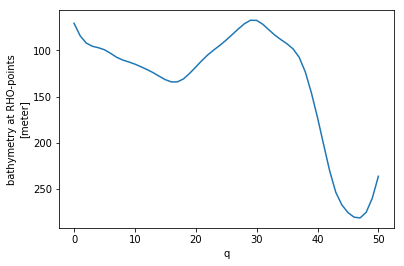

In [16]:
# Make DataArrays
Xv = xr.DataArray(X, dims=['q'], coords=dict(q=np.arange(Npoints+1)))
Yv = xr.DataArray(Y, dims=['q'], coords=dict(q=np.arange(Npoints+1)))
B = A.interp(xi_rho=Xv, eta_rho=Yv)
B
# Plot depth along section
B.h.plot(yincrease=False)
#B.h.plot(x=B.lon_rho, yincrease=False)

In [67]:
# mid points on edges
Xe = 0.5*(X[:-1] + X[1:])
Ye = 0.5*(Y[:-1] + Y[1:])
Xe = xr.DataArray(Xe, dims=['q'], coords=dict(q=np.arange(Npoints)))
Ye = xr.DataArray(Ye, dims=['q'], coords=dict(q=np.arange(Npoints)))

Bp = A.interp(xi_rho=Xv, eta_rho=Yv)
Be = A.interp(xi_rho=Xe, eta_rho=Ye)

Dx2 = (Bp.xi_rho.values[1:] - Bp.xi_rho.values[:-1])**2 / Be.pm.values**2
Dy2 = (Bp.eta_rho.values[1:] - Bp.eta_rho.values[:-1])**2 / Be.pn.values**2
D = np.sqrt(Dx2 + Dy2)

# OBS. distance = feil, regn nærmere
# Skill mellom vertices og edges
#coords = {'time': B0.time, 's_rho': B0.s_rho, 'q': B0.q, 'distance': d, 'z': B.z, 'depth': -B.z}
Be.coords['distance'] = np.cumsum(D) / 1000.0
Be.coords['depth'] = -Be.z_rho
# B['distance'].attributes = {'units': 'km'}
# B.swap_dims({'q': 'distance'})
#B['distance'].attrs = {'units': 'km', 'long_name':'Distance along section'}
#B['depth'].attrs = {'units': 'm'}
# Be.depth.swap_dims({'q': 'distance'}) Virker ikke
# Definer fullt data-array for detph.

TypeError: unhashable type: 'DataArray'

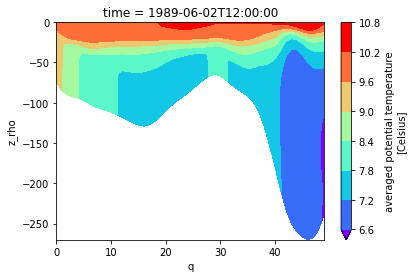

In [61]:
T = Be.temp.isel(time=3)
T.plot.contourf('q', 'z_rho', robust=True, cmap='rainbow')
# T['depth'] = -T.z
# Denne virker ikke, hverken med z eller depth
# T.plot.pcolormesh('q', 'z')
# T.plot.contourf('distance', 'depth', yincrease=False)
# T.plot.contourf('q', 'depth', yincrease=False)  # Denne virker


In [27]:
#T = B.temp.isel(time=3)
#T.plot.contourf('q', 'z', robust=True, cmap='rainbow')
#T['depth'] = -T.z
# Denne virker ikke, hverken med z eller depth
# T.plot.pcolormesh('q', 'z')
# T.plot.contourf('q', 'depth')

In [9]:
S = B.salt.isel(time=3)
levels = [32, 33, 34, 34.5, 34.8, 34.9, 35.0, 35.1, 35.2]
S.plot.contourf('q', 'z', levels=levels, cmap='rainbow_r')

ValueError: x and y must be coordinate variables

In [10]:
# Kan lage Dataset med relevante variable

#grid_vars = ['xi_rho', 'eta_rho', 'xi_u', 'eta_u', 'xi_v', 'eta_v', 
#             'time', 's_rho', 's_w', 'lon_rho', 'lat_rho']
# data_vars = ['']
#data_vars = ['h', 'mask_rho', 'u', 'v', 'temp', 'salt']
grid_vars = ['mask_rho', 'h', 'lon_rho', 'lat_rho', 'pm', 'pn', 's_rho', 's_w', 'time']
data_vars = ['zeta', 'u', 'v', 'temp', 'salt']
derived_vars = ['z_rho']
V = grid_vars + data_vars + derived_vars
#V = grid_vars 

G = {s:A[s] for s in V}

B = xr.Dataset(G)
B

<xarray.Dataset>
Dimensions:   (eta_rho: 192, eta_u: 192, eta_v: 191, s_rho: 32, s_w: 33, time: 10, xi_rho: 182, xi_u: 181, xi_v: 182)
Coordinates:
  * xi_rho    (xi_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * eta_rho   (eta_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    lat_rho   (eta_rho, xi_rho) float64 48.0 48.06 48.13 48.19 48.25 48.32 ...
    lon_rho   (eta_rho, xi_rho) float64 -1.0 -0.9078 -0.8155 -0.7232 -0.6309 ...
  * time      (time) datetime64[ns] 1989-05-24T12:00:00 1989-05-27T12:00:00 ...
  * xi_u      (xi_u) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * eta_u     (eta_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * s_rho     (s_rho) float64 -0.9844 -0.9531 -0.9219 -0.8906 -0.8594 ...
  * xi_v      (xi_v) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * eta_v     (eta_v) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
    z_rho     (s_rho, eta_rho, xi_rho) float32 -4.92188 -4.9

In [11]:
B.h


<xarray.DataArray 'h' (eta_rho: 192, xi_rho: 182)>
array([[    5.      ,     5.      ,     5.      , ...,     5.      ,
            5.      ,     5.      ],
       [    5.      ,     5.      ,     5.      , ...,     5.      ,
            5.      ,     5.      ],
       [    5.      ,     5.      ,     5.      , ...,     5.      ,
            5.      ,     5.      ],
       ..., 
       [ 2194.88739 ,  2179.544351,  2133.600487, ...,   344.860088,
          334.600903,   331.234588],
       [ 2128.993536,  2109.46699 ,  2054.094557, ...,   325.041484,
          313.958383,   310.476131],
       [ 2103.32002 ,  2082.164104,  2023.290909, ...,   318.360591,
          307.140759,   303.649223]])
Coordinates:
  * xi_rho   (xi_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * eta_rho  (eta_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    lat_rho  (eta_rho, xi_rho) float64 48.0 48.06 48.13 48.19 48.25 48.32 ...
    lon_rho  (eta_rho, xi_rho) float64 -1.0 -0.90